1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [90]:
# Import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True) 

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [91]:
# Import the datsets
pdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
pdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [92]:
# Check datatype
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [93]:
# statistical summary
pdata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [94]:
# Shape
pdata.shape

(5000, 14)

In [95]:
# null values or incorrect imputation
pdata.isnull().values.any()

False

2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

2.1 Number of unique in each column?

In [96]:
pdata.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

2.2 Number of people with zero mortgage? Answer: 3462

In [97]:
pdata['Mortgage'].value_counts().sort_index()

0      3462
75        8
76       12
77        4
78       15
       ... 
590       1
601       1
612       1
617       1
635       1
Name: Mortgage, Length: 347, dtype: int64

2.3 Number of people with zero credit card spending per month? Answer: 3530

In [98]:
pdata['CreditCard'].value_counts().sort_index()

0    3530
1    1470
Name: CreditCard, dtype: int64

2.4 Value counts of all categorical columns.

Chanhyun's note: 
Family                   4
Education                3
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2

In [99]:
pdata['Family'].value_counts().sort_index()

1    1472
2    1296
3    1010
4    1222
Name: Family, dtype: int64

In [100]:
pdata['Education'].value_counts().sort_index()

1    2096
2    1403
3    1501
Name: Education, dtype: int64

In [101]:
pdata['Personal Loan'].value_counts().sort_index()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [102]:
pdata['Securities Account'].value_counts().sort_index()

0    4478
1     522
Name: Securities Account, dtype: int64

In [103]:
pdata['CD Account'].value_counts().sort_index()

0    4698
1     302
Name: CD Account, dtype: int64

In [104]:
pdata['Online'].value_counts().sort_index()

0    2016
1    2984
Name: Online, dtype: int64

In [105]:
pdata['CreditCard'].value_counts().sort_index()

0    3530
1    1470
Name: CreditCard, dtype: int64

2.5 Univariate and Bivariate

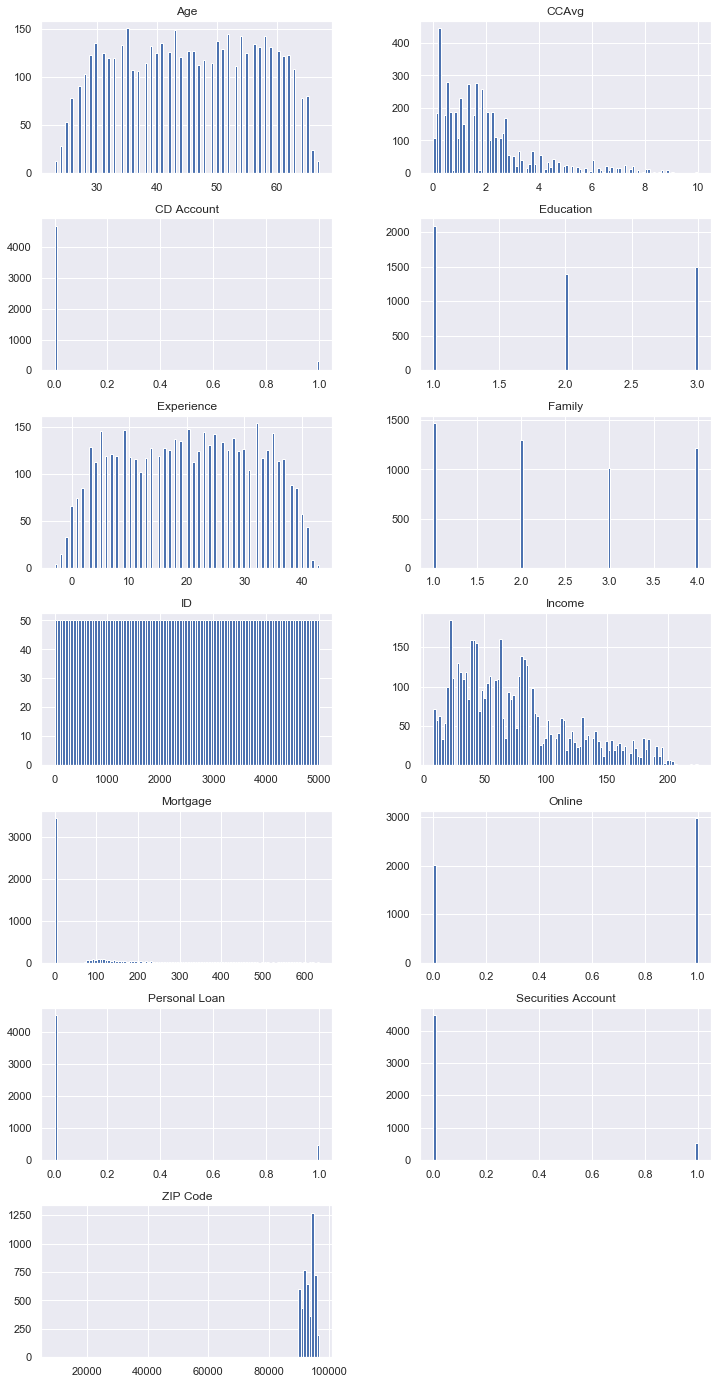

In [121]:
# Univariate for continouse variable 
columns = list(pdata)[0:-1] # Excluding Outcome column which has only 
pdata[columns].hist(stacked=False, bins=100, figsize=(12,50), layout=(14,2)); 

In [116]:
# Bivariate 
# correation 
pdata2 = pdata.drop(["ID", "ZIP Code"], axis=1) 
pdata2.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [117]:
pdata2.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


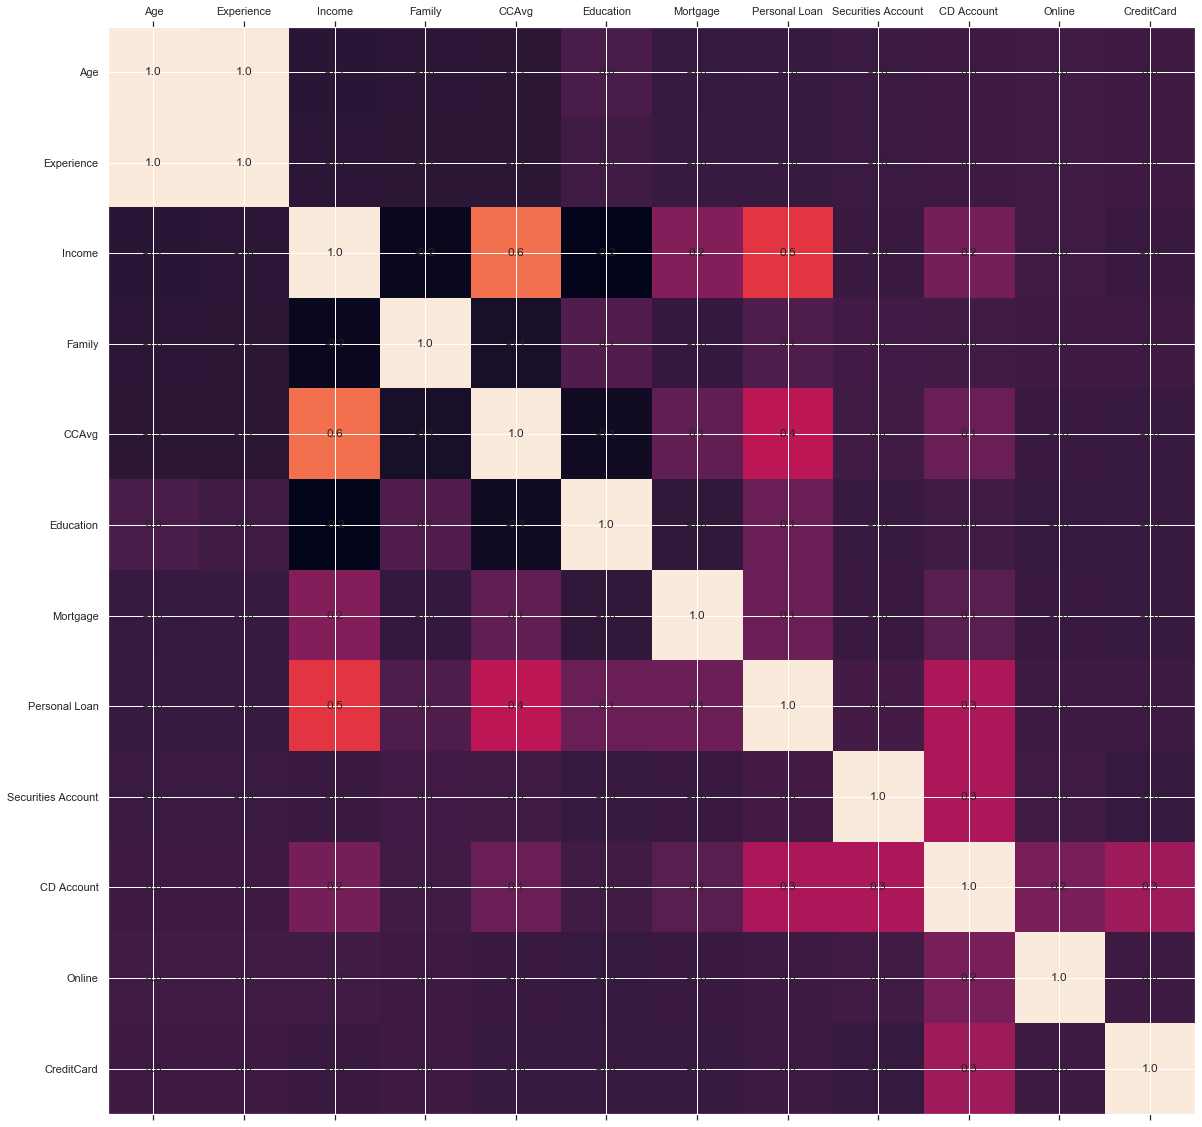

In [118]:
def plot_corr(df, size=20):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center') 
        
plot_corr(pdata2)

In [ ]:
sns.pairplot(pdata2,diag_kind='auto')

2.6 Get data model ready

In [112]:
# I drop the ID and ZIP Code variables since that don't explanin#
dummy_pdata = pd.get_dummies(pdata2, drop_first=True)
dummy_pdata.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [74]:
X = dummy_pdata.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
Y = dummy_pdata['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=12345) # 1 is just any random seed number

x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
509,52,28,118,2,6.8,1,112,0,0,1,0
3847,43,18,94,4,1.1,2,0,0,0,0,0
3417,39,12,23,3,1.0,2,0,0,0,1,1
382,65,41,133,4,2.0,1,0,0,0,0,1
1345,57,32,23,2,0.2,3,0,0,0,0,0


In [76]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(dummy_pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(dummy_pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [77]:
print("Original Loan True Values    : {0} ({1:0.2f}%)".format(len(dummy_pdata.loc[pdata['Personal Loan'] == 1]), (len(dummy_pdata.loc[pdata['Personal Loan'] == 1])/len(dummy_pdata.index)) * 100))
print("Original Loan False Values   : {0} ({1:0.2f}%)".format(len(dummy_pdata.loc[pdata['Personal Loan'] == 0]), (len(dummy_pdata.loc[pdata['Personal Loan'] == 0])/len(dummy_pdata.index)) * 100))
print("")
print("Training Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Loan True Values    : 480 (9.60%)
Original Loan False Values   : 4520 (90.40%)

Training Loan True Values    : 343 (9.80%)
Training Loan False Values   : 3157 (90.20%)

Test Loan True Values        : 137 (9.13%)
Test Loan False Values       : 1363 (90.87%)



4. Use Logistic Regression model to predict the number of a customers buying personal loans. 
   Print all the metrics related for evaluating the model performance (15 marks)

In [78]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)


          0         1        2         3         4         5         6  \
0 -0.408955  0.411227  0.04901  0.630164  0.103105  1.633275  0.000708   

          7         8         9        10  intercept  
0 -0.654932  2.775162 -0.441519 -0.858997  -2.072862  


In [79]:
# Alaternative approach
import statsmodels.api as sm
logit = sm.Logit(y_train, sm.add_constant(x_train))
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.137038
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:                Logit            Pseudo R-squared: 0.573      
Dependent Variable:   Personal Loan    AIC:              983.2675   
Date:                 2020-06-27 22:21 BIC:              1057.1937  
No. Observations:     3500             Log-Likelihood:   -479.63    
Df Model:             11               LL-Null:          -1122.3    
Df Residuals:         3488             LLR p-value:      6.3110e-269
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       9.0000                                        
--------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
--------------------------------------------------------------------
const              -10.4541   1.9305 -5.4153 0.0000 -14.2378 -6.6704
Age                 -0.1051   0.0727 -1.4465 0.1480  -0.2476  0.0373
Experience           0.1138   0.0721  1.5785 0.1145  -0.0275  0.2551
Income               0.0521   0.0030 17.4989 0.0000   0.0462  0.0579
Family               0.6797   0.0849  8.0065 0.0000   0.5133  0.8461
CCAvg                0.1107   0.0469  2.3590 0.0183   0.0187  0.2027
Education            1.6958   0.1306 12.9892 0.0000   1.4399  1.9516
Mortgage             0.0007   0.0007  0.9963 0.3191  -0.0006  0.0020
Securities Account  -0.8435   0.3291 -2.5632 0.0104  -1.4884 -0.1985
CD Account           3.2472   0.3810  8.5237 0.0000   2.5006  3.9939
Online              -0.4886   0.1816 -2.6906 0.0071  -0.8445 -0.1327
CreditCard          -1.0239   0.2339 -4.3780 0.0000  -1.4823 -0.5655
====================================================================

"""

In [80]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9546666666666667


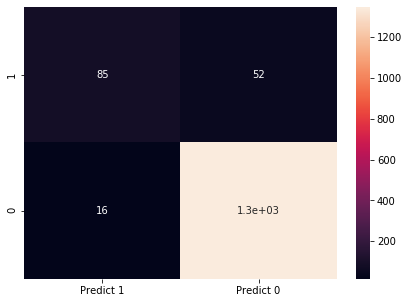

In [81]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

5. Give your reasoning on how can the model perform better? (10 marks)
   Hint: Check parameter

Chanhyun's Answer: 

The confusion matrix
- True Positives (TP): we correctly predicted that they buy personal loans 85
- True Negatives (TN): we correctly predicted that they don't buy personal loans 1303
- False Positives (FP): we incorrectly predicted that they buy personal loans(a "Type I error") 16 
- False Negatives (FN): we incorrectly predicted that they don't buy personal loans (a "Type II error") 52


Accuracy =  TP + TN / total = (85+1303)/(85+1303+16+52) = 0.953
Classification Error Rate = FP + FN / toatal = (16+52)/(85+1303+16+52) = 0.047
Sensitivity = 95/(85+52) = 0.693
Specificity = 1303/(1303+16) = 0.988

Currently, the specificity is high, but the sensitivity is low. Thus, increasing the sensitivity value would be a good approache to improve the model. 

6. Give Business understanding of your model? (5 marks)

Chanhyun's Answer

Income, Family, CCAvg, Education, Securities Account, CD account, Online, and CreditCard are the significant factors to predict that people buy personal loan or not. 
On the other hand, Age, Experience, and Morgage are not the useful predictors. 
